In [ ]:
#1
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [ ]:
#2
df = pd.read_csv("Pokemon.csv")

In [ ]:
#3
df.shape

In [ ]:
#4
df_column = df.columns
df_column

In [ ]:
#5
df = df.drop(['#'], axis = 1)
df

In [ ]:
#6
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
#7
df['count'] = 1
df.loc[df['Name'].str.contains('Mega')].count()['count']

In [ ]:
#8
df.loc[:,'Sp. Def'].std()

In [ ]:
#9
df['Legendary'].value_counts(normalize=True).mul(100).astype(str)+'%'

<BarContainer object of 18 artists>

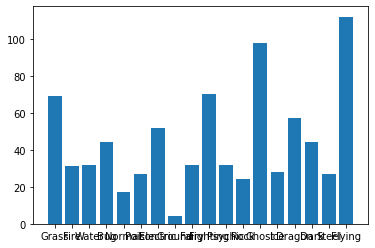

In [ ]:
#10(a)
df['counts'] = 1
s1 = df.groupby("Type 1").count()['counts']
s2 = s1.drop(columns = 'Type 1')
plt.bar(df['Type 1'].unique(),s2)

<BarContainer object of 2 artists>

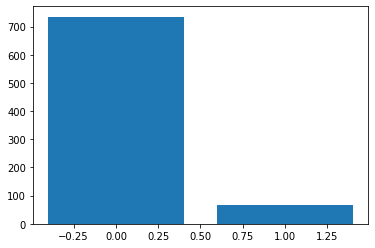

In [ ]:
#10(a)
s3 = df.groupby("Legendary").count()['counts']
s4 = s3.drop(columns = 'Legendary')
plt.bar(df['Legendary'].unique(),s4)

In [ ]:
#10(b)


Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: counts, dtype: int64

In [ ]:
#11(a)
n1 = df[[ "#" , "Total" , "HP" , "Attack", "Defense" , "Sp. Atk" , "Sp. Def" , "Speed" , "Generation" , "counts" , "count" ]].median()
n2 = df[[ "#" , "Total" , "HP" , "Attack", "Defense" , "Sp. Atk" , "Sp. Def" , "Speed" , "Generation" , "counts" , "count"]].var()
n3 = df[[ "#" , "Total" , "HP" , "Attack", "Defense" , "Sp. Atk" , "Sp. Def" , "Speed" , "Generation" , "counts" , "count"]].skew()
new = pd.concat([n1, n2,n3], axis=1)
new2 = np.transpose(new)
b = pd.concat([new2, df.describe()], axis=0)
b["index"] = ['median' , 'variance' , 'skew' , "count" , "mean" , "std" , "min" , "25%" , "50%" , "75%" , "max" ]
b = b.set_index("index")
b = b.drop(columns = ['count' , 'counts'])
b.loc["interquartile"] = b.loc['75%'] - b.loc['25%']
b

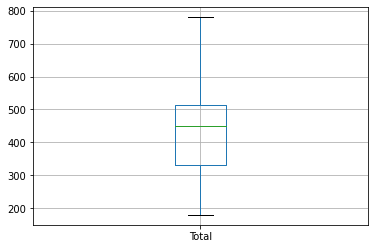

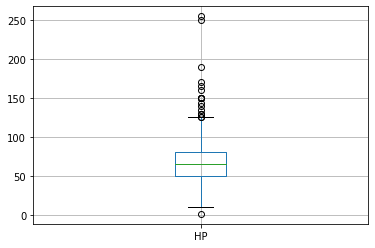

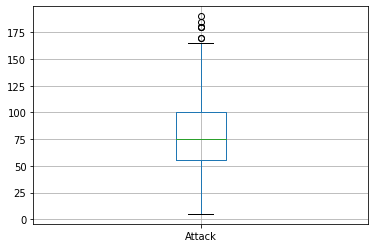

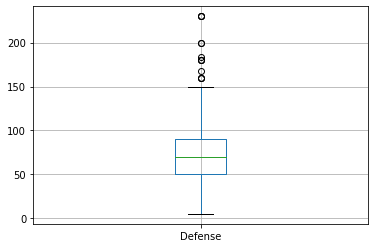

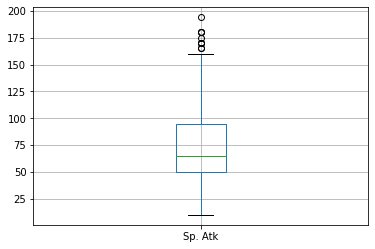

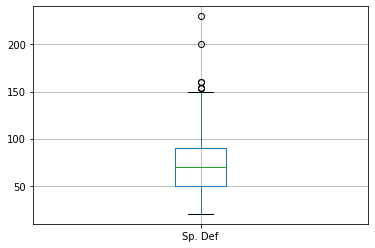

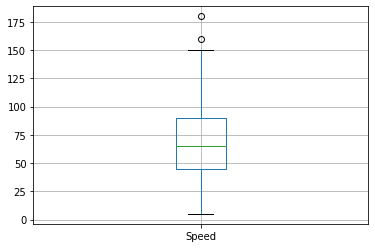

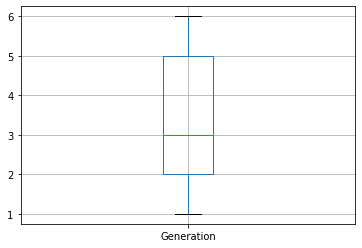

In [ ]:
#11(b)
d5=df.drop(columns = ['#' , 'Name' , 'Type 1' , 'Type 2' , 'Legendary' , 'counts'])
for column in d5:
    plt.figure()
    d5.boxplot([column])

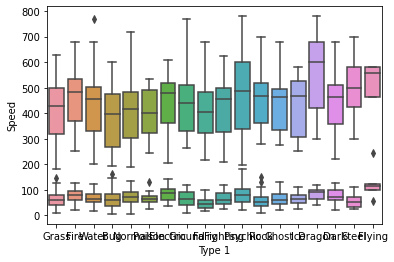

In [ ]:
#12(a)
d2=df.drop(columns = ['#' , 'Name' , 'Type 2' , 'Legendary' , 'counts'  , 'HP' , 'Attack', 'Defense' , 'Sp. Atk' , 'Sp. Def' , 'Speed' , 'Generation' ])
sns.boxplot(x="Type 1",y="Total",data=d2)
d3=df.drop(columns = ['#' , 'Name' , 'Type 2' , 'Legendary' , 'counts'  , 'HP' , 'Attack', 'Defense' , 'Sp. Atk' , 'Sp. Def' , 'Generation' ,'Total'])
sns.boxplot(x="Type 1",y="Speed",data=d3)

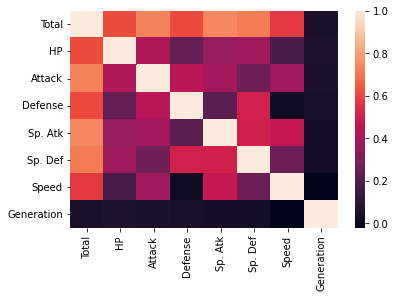

In [ ]:
#12(b)
c = df.drop(columns = ['#' , 'Name' , 'Type 1' , 'Type 2' , 'Legendary' , 'count' , 'counts'])
dataplot = sns.heatmap(c.corr())